In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from utils import set_pretty_prints, load_dataset

In [3]:
set_pretty_prints()

In [4]:
df = load_dataset('imobiliare.ro')

In [5]:
df

,Unnamed: 0,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price/Surface,Price,WebPage
0,1,2,56.00,0,1,0,2,1,1,639.29,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAU700006?lista=2349706&listing=1
1,2,2,57.00,0,1,0,2,0,1,628.07,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001O?lista=2349706&listing=1
2,3,2,67.00,0,1,0,2,1,1,591.04,39600,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001K?lista=2349706&listing=1
3,4,1,48.00,0,1,0,2,1,1,620.83,29800,https://www.imobiliare.ro/vanzare-garsoniere/bucuresti/rahova/garsoniera-de-vanzare-XAG00001J?lista=2349706&listing=1
4,5,3,89.60,0,0,1,3,1,1,1260.04,112900,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/p-ta-presei-libere/apartament-de-vanzare-3-camere-XB0V00003?lista=2349706&listing=1
...,...,...,...,...,...,...,...,...,...,...,...,...
9892,9894,4,90.00,0,0,1,8,0,0,944.44,85000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/crangasi/apartament-de-vanzare-4-camere-X5LL10023?lista=2349706&listing=1
9893,9895,3,85.00,0,0,1,8,1,0,1588.22,134999,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/central/apartament-de-vanzare-3-camere-X9I6100JP?lista=2349706&listing=1
9894,9896,2,48.00,0,0,1,4,0,0,1229.17,59000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/apusului/apartament-de-vanzare-2-camere-XBJG000HP?lista=2349706&listing=1
9895,9897,4,83.81,0,0,1,3,1,1,1312.49,110000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/theodor-pallady/penthouse-de-vanzare-4-camere-XANO10193?lista=2349706&listing=1


In [10]:
y_sqmp = df["Price/Surface"]
y_price = df['Price']

# TODO: select viable features
START = 1
END = 9
X = df.iloc[:,START:END]


In [11]:
X

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
0,2,56.00,0,1,0,2,1,1
1,2,57.00,0,1,0,2,0,1
2,2,67.00,0,1,0,2,1,1
3,1,48.00,0,1,0,2,1,1
4,3,89.60,0,0,1,3,1,1
...,...,...,...,...,...,...,...,...
9892,4,90.00,0,0,1,8,0,0
9893,3,85.00,0,0,1,8,1,0
9894,2,48.00,0,0,1,4,0,0
9895,4,83.81,0,0,1,3,1,1


In [12]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

## Exploration

Text(0.5, 1.0, 'Distribution of nr of rooms per apartment')

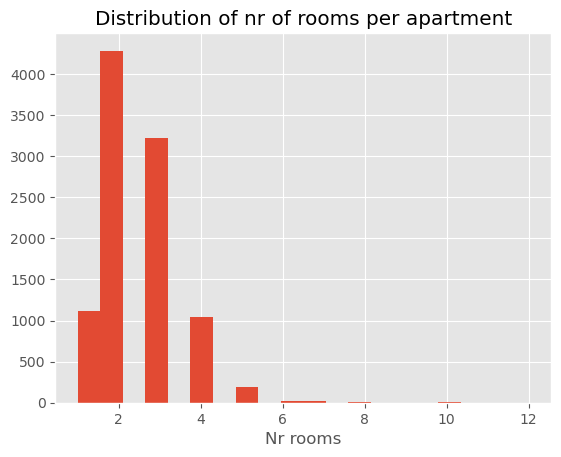

In [13]:
field = 'nr cam'
x_label = 'Nr rooms'
title = 'Distribution of nr of rooms per apartment'
X[field].hist(bins=20)
plt.xlabel(x_label)
plt.title(title)

Text(0.5, 1.0, 'Distribution of surface per apartment')

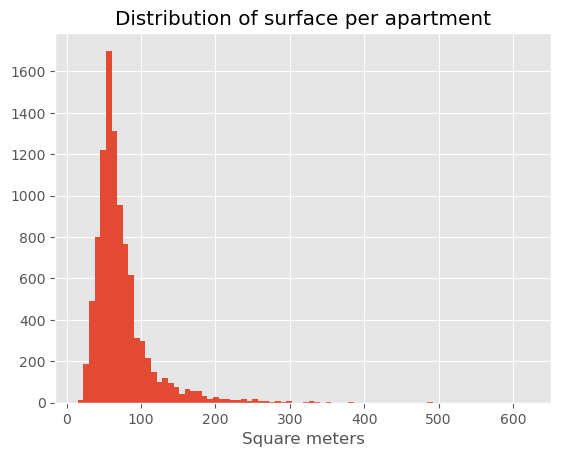

In [24]:
# TODO: Analyse a few more features
field = "mp"
x_label = "Square meters"
title = "Distribution of surface per apartment"
X[field].hist(bins=80)
plt.xlabel(x_label)
plt.title(title)

Text(0.5, 1.0, 'Distribution of surface per apartment')

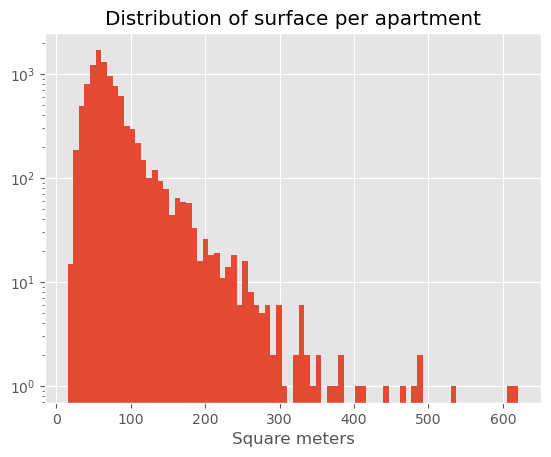

In [23]:
# TODO: Analyse a few more features
field = "mp"
x_label = "Square meters"
title = "Distribution of surface per apartment"
X[field].hist(bins=80, log=True)
plt.xlabel(x_label)
plt.title(title)

Text(0.5, 0, 'Max floor')

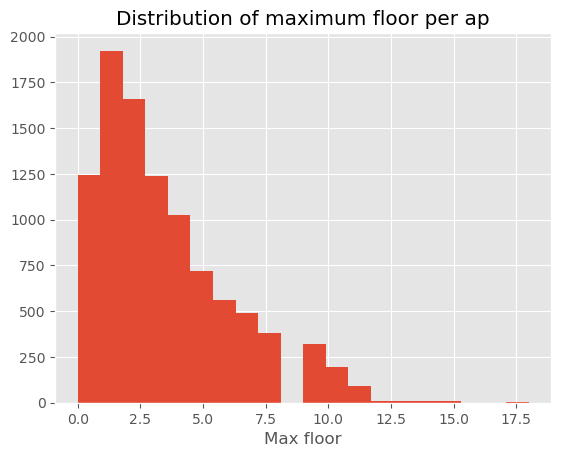

In [18]:
# TODO: Analyse target distribution
target = "etaj max"
title = "Distribution of maximum floor per ap"
x_label = "Max floor"
X[target].hist(bins=20)
plt.title(title)
plt.xlabel(x_label)


Text(0.5, 0, 'Property type (1=new)')

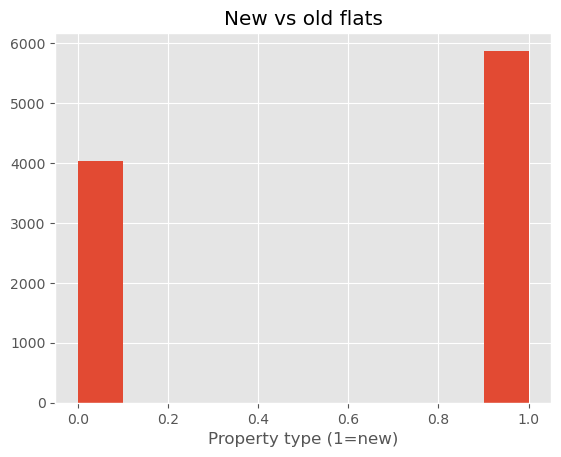

In [20]:
# TODO: Re-display the target distribution
target = "bloc nou"
title = "New vs old flats"
x_label = "Property type (1=new)"
X.loc[:, target].hist()
plt.title(title)
plt.xlabel(x_label)

In [25]:
X.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000


In [26]:
new_corr_features = ['nr cam', 'mp', 'parter', 'et1-2', 'et3+','etaj max', 'typ_decom', 'bloc nou', 'Price']

In [27]:
df_new = df[new_corr_features]

In [28]:
df_new.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376,0.525333
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321,0.770386
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453,-0.020806
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789,-0.061217
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905,0.072650
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046,0.091064
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843,0.034928
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000,0.035021
Price,0.525333,0.770386,-0.020806,-0.061217,0.072650,0.091064,0.034928,0.035021,1.000000


## Modelling
- further process X data maybe
- construct normal eq and determine model coefs `(((XtX)^-1)Xt)y (y = x*w => w = y/x)`
- validate results (how, when)

`f(X) = y = X[0]*w[0] + X[1]*w[1] + .... X[N]*w[N] +X[N+1]*w[N+1] | X[N+1] == 1`

In [29]:
X.mean()

nr cam        2.505709
mp           73.704865
parter        0.125695
et1-2         0.361827
et3+          0.512479
etaj max      3.336466
typ_decom     0.717591
bloc nou      0.593210
dtype: float64

In [30]:
X.min()

nr cam        1.0
mp           15.0
parter        0.0
et1-2         0.0
et3+          0.0
etaj max      0.0
typ_decom     0.0
bloc nou      0.0
dtype: float64

In [31]:
X.std()

nr cam        0.950467
mp           40.174869
parter        0.331522
et1-2         0.480553
et3+          0.499870
etaj max      2.818757
typ_decom     0.450194
bloc nou      0.491260
dtype: float64

In [32]:
X.max()

nr cam        12.0
mp           621.0
parter         1.0
et1-2          1.0
et3+           1.0
etaj max      18.0
typ_decom      1.0
bloc nou       1.0
dtype: float64

In [33]:
np_X = X.values

In [34]:
np_X

array([[  2.  ,  56.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  2.  ,  57.  ,   0.  ,   1.  ,   0.  ,   2.  ,   0.  ,   1.  ],
       [  2.  ,  67.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  1.  ,  48.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  3.  ,  89.6 ,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  2.  ,  65.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  2.  ,  46.  ,   0.  ,   0.  ,   1.  ,   4.  ,   1.  ,   1.  ],
       [  6.  , 334.  ,   0.  ,   0.  ,   1.  ,  10.  ,   1.  ,   1.  ],
       [  3.  , 104.26,   0.  ,   0.  ,   1.  ,  11.  ,   1.  ,   1.  ],
       [  2.  ,  65.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [  2.  ,  46.  ,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  1.  ,  43.02,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ],
       [  3.  ,  80.23,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  1.  ,  30.  ,   1.  ,   0.  ,   0.  ,   0

In [35]:
np_X.mean(axis=0)

array([ 2.51, 73.7 ,  0.13,  0.36,  0.51,  3.34,  0.72,  0.59])

In [36]:
np_X_n = (np_X - np_X.mean(0)) / np_X.std(0)

In [37]:
np_X_n

array([[-0.53, -0.44, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-0.53, -0.42, -0.38,  1.33, -1.03, -0.47, -1.59,  0.83],
       [-0.53, -0.17, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-1.58, -0.64, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [ 0.52,  0.4 , -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-0.53, -0.69, -0.38, -0.75,  0.98,  0.24,  0.63,  0.83],
       [ 3.68,  6.48, -0.38, -0.75,  0.98,  2.36,  0.63,  0.83],
       [ 0.52,  0.76, -0.38, -0.75,  0.98,  2.72,  0.63,  0.83],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.83, -1.59,  0.83],
       [-0.53, -0.69, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-1.58, -0.76,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83],
       [ 0.52,  0.16, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-1.58, -1.09,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83],
       [-0.53, -0.19, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [ 1.57,  0.42, -0.

In [38]:
np_X_n.mean(axis=0)

array([-0., -0.,  0.,  0., -0.,  0.,  0.,  0.])

In [39]:
np_y = y_price.values
np_y_n = (np_y - np_y.min()) / (np_y.max() - np_y.min())
np_y_n

array([0.  , 0.  , 0.01, 0.  , 0.02, 0.01, 0.01, 0.6 , 0.08, 0.01, 0.01, 0.01, 0.02, 0.  , 0.02, 0.03, 0.03, 0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.02, 0.01, 0.02, 0.05, 0.05, 0.05, 0.11, 0.01, 0.04, 0.1 , 0.17, 0.11, 0.03, 0.25, 0.11, 0.2 , 0.03, 0.14, 0.  , 0.01, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.02, 0.14, 0.01, 0.04, 0.03, 0.05, 0.02, 0.02, 0.01, 0.01, 0.1 , 0.07, 0.01, 0.07, 0.03, 0.01, 0.01, 0.01, 0.02, 0.1 , 0.02, 0.05, 0.02, 0.  , 0.02, 0.04, 0.01, 0.01, 0.03, 0.  , 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.03, 0.01, 0.  , 0.04, 0.05, 0.01, 0.01, 0.02, 0.01, 0.01, 0.03, 0.01, 0.03, 0.02, 0.02, 0.02, 0.01, 0.01, 0.04, 0.03, 0.02, 0.01, 0.01, 0.02, 0.01, 0.04, 0.02, 0.12, 0.04, 0.04, 0.02, 0.03, 0.01, 0.02, 0.02, 0.02, 0.  , 0.01, 0.04, 0.04, 0.03, 0.07, 0.06, 0.01, 0.01, 0.05, 0.1 , 0.12, 0.03, 0.03, 0.05, 0.03, 0.02, 0.02, 0.14, 0.04, 0.01, 0.03, 0.02, 0.03, 0.03, 0.02, 0.01, 0.05, 0.03, 0.06, 0.04, 0.02, 0.04, 0.03, 0.03, 0.01, 0.08, 0.01, 0.02, 0.02, 0.01, 0.02, 0.05,
  

In [41]:
np_y.min()


18000

In [42]:
np_y.max()

3880000

In [43]:
y_norm_sub = np_y.min()
y_norm_div = np_y.max() - np_y.min()

In [44]:
# TODO: write normal eq for raw data
np_weights = np.linalg.inv(np_X.T.dot(np_X)).dot(np_X.T).dot(np_y_n)

# TODO: write normal eq for normalized data
np_weights_n = np.linalg.inv(np_X_n.T.dot(np_X_n)).dot(np_X_n.T).dot(np_y_n)



In [45]:
np_weights

array([-0.01,  0.  , -0.02, -0.02, -0.02,  0.  , -0.  ,  0.  ])

In [46]:
np_weights_n

array([-0.01,  0.04, -0.  , -0.  , -0.  ,  0.  , -0.  ,  0.  ])

In [48]:
#TODO: calc inferences for raw data model
np_y_hat = np_X.dot(np_weights)

#TODO: calc inferences for normalized data model
np_y_hat_n = np_X_n.dot(np_weights_n)

In [50]:
np_y_hat

array([ 0.01,  0.02,  0.03,  0.02,  0.04,  0.02,  0.01,  0.28,  0.06,  0.03,  0.01,  0.01,  0.03, -0.01,  0.03,  0.04,  0.05,  0.01,  0.03,  0.02,  0.01, -0.  ,  0.  ,  0.03,  0.01,  0.02,  0.02,  0.04,  0.03,  0.04,  0.01,  0.02,  0.12,  0.2 ,  0.13,  0.02,  0.21,  0.14,  0.16,  0.02,  0.16, -0.  ,  0.03,  0.1 ,  0.02,  0.01,  0.02,  0.04,  0.02,  0.02,  0.14,  0.01,  0.05,  0.02,  0.04,  0.02,  0.02,  0.  ,  0.02,  0.12,  0.07,  0.02,  0.05,  0.02,  0.01,  0.05,  0.  ,  0.02,  0.11,  0.01,
        0.04,  0.02, -0.01,  0.03,  0.03,  0.02,  0.01,  0.04,  0.  ,  0.01,  0.02,  0.02,  0.02,  0.01,  0.01,  0.04,  0.02, -0.  ,  0.04,  0.04,  0.02,  0.02,  0.01,  0.  ,  0.02,  0.04,  0.01,  0.01,  0.02,  0.04,  0.02, -0.  ,  0.01,  0.05,  0.03,  0.04,  0.03,  0.01,  0.03,  0.01,  0.04,  0.02,  0.11,  0.06,  0.05,  0.02,  0.03,  0.01,  0.02,  0.02,  0.02, -0.01,  0.  ,  0.07,  0.03,  0.02,  0.12,  0.05,  0.01, -0.  ,  0.03,  0.13,  0.12,  0.04,  0.01,  0.03,  0.03,  0.04,  0.03,  0.16,
      

Text(0.5, 1.0, 'Normed data model predictions')

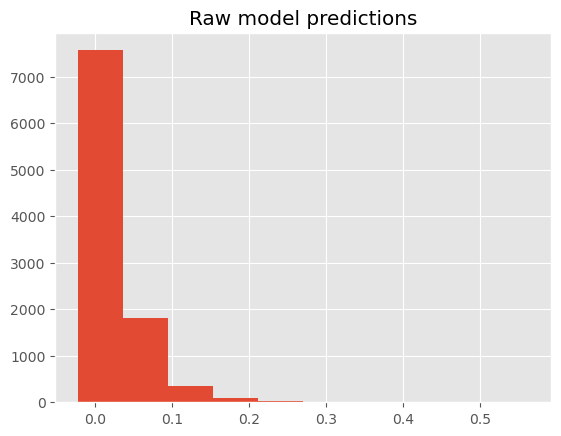

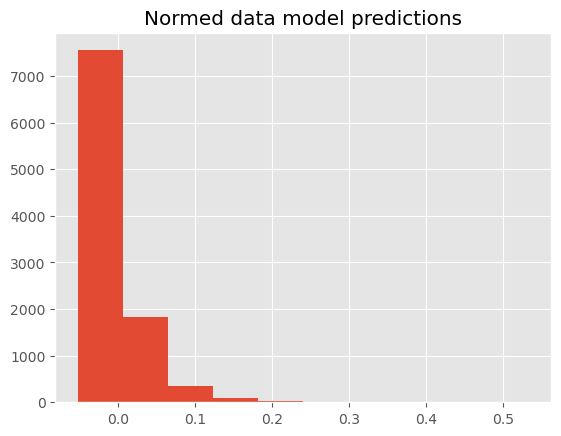

In [52]:
plt.figure()
plt.hist(np_y_hat)
plt.title('Raw model predictions')
plt.figure()
plt.hist(np_y_hat_n)
plt.title('Normed data model predictions')

### One more model before testing results

Lets further improve model by adding bias

In [53]:
ones = np.ones(shape=(np_X_n.shape[0], 1))
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [54]:
np_X_nb = np.concatenate((np_X_n, ones), axis=-1)
np_X_nb

array([[-0.53, -0.44, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [-0.53, -0.42, -0.38,  1.33, -1.03, -0.47, -1.59,  0.83,  1.  ],
       [-0.53, -0.17, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [-1.58, -0.64, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [ 0.52,  0.4 , -0.38, -0.75,  0.98, -0.12,  0.63,  0.83,  1.  ],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [-0.53, -0.69, -0.38, -0.75,  0.98,  0.24,  0.63,  0.83,  1.  ],
       [ 3.68,  6.48, -0.38, -0.75,  0.98,  2.36,  0.63,  0.83,  1.  ],
       [ 0.52,  0.76, -0.38, -0.75,  0.98,  2.72,  0.63,  0.83,  1.  ],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.83, -1.59,  0.83,  1.  ],
       [-0.53, -0.69, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83,  1.  ],
       [-1.58, -0.76,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83,  1.  ],
       [ 0.52,  0.16, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83,  1.  ],
       [-1.58, -1.09,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83, 

In [56]:
# TODO: calculate weights
np_weights_nb = np.linalg.inv(np_X_nb.T.dot(np_X_nb)).dot(np_X_nb.T).dot(np_y_n)
np_weights_nb

array([-0.01,  0.04,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.03])

In [59]:
# TODO: calculate predictions
np_y_hat_nb = np_X_nb.dot(np_weights_nb)
np_y_hat_nb

array([ 0.01,  0.02,  0.03,  0.02,  0.04,  0.02,  0.01,  0.28,  0.06,  0.03,  0.01,  0.01,  0.03, -0.01,  0.03,  0.04,  0.05,  0.01,  0.03,  0.02,  0.01, -0.  ,  0.  ,  0.03,  0.01,  0.02,  0.02,  0.04,  0.03,  0.04,  0.01,  0.02,  0.12,  0.2 ,  0.13,  0.02,  0.21,  0.14,  0.16,  0.02,  0.16, -0.  ,  0.03,  0.1 ,  0.02,  0.01,  0.02,  0.04,  0.02,  0.02,  0.14,  0.01,  0.05,  0.02,  0.04,  0.02,  0.02,  0.  ,  0.02,  0.12,  0.07,  0.02,  0.05,  0.02,  0.01,  0.05,  0.  ,  0.02,  0.11,  0.01,
        0.04,  0.02, -0.01,  0.03,  0.03,  0.02,  0.01,  0.04,  0.  ,  0.01,  0.02,  0.02,  0.02,  0.01,  0.01,  0.04,  0.02, -0.  ,  0.04,  0.04,  0.02,  0.02,  0.01,  0.  ,  0.01,  0.04,  0.01,  0.01,  0.02,  0.04,  0.02, -0.  ,  0.01,  0.05,  0.03,  0.04,  0.03,  0.01,  0.03,  0.01,  0.04,  0.02,  0.11,  0.06,  0.05,  0.02,  0.03,  0.01,  0.02,  0.02,  0.02, -0.01,  0.  ,  0.07,  0.03,  0.02,  0.12,  0.05,  0.01, -0.  ,  0.03,  0.13,  0.12,  0.04,  0.01,  0.03,  0.03,  0.04,  0.03,  0.16,
      

(array([  21.,  618., 2161., 3041., 1712.,  778.,  439.,  269.,  197.,  146.,  104.,  101.,   78.,   41.,   34.,   31.,   13.,   27.,   15.,   16.,   11.,   13.,    4.,    2.,    2.,    4.,    1.,    3.,    3.,    0.,    1.,    1.,    2.,    0.,    1.,    0.,    0.,    1.,    1.,    2.,    0.,    0.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,    1.]),
 array([-0.02, -0.01,  0.  ,  0.01,  0.02,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.11,  0.12,  0.13,  0.14,  0.15,  0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.24,  0.25,  0.26,  0.27,  0.28,  0.29,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.52,  0.53,  0.54,  0.55,  0.56]),
 <BarContainer object of 50 artists>)

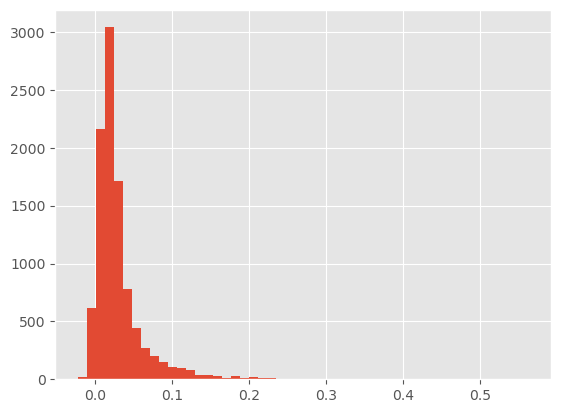

In [60]:
plt.hist(np_y_hat_nb, bins=50)

In [61]:
np_y_pred_price = np_y_hat * y_norm_div + y_norm_sub
np_y_pred_n_price = np_y_hat_n * y_norm_div + y_norm_sub
np_y_pred_nb_price = np_y_hat_nb * y_norm_div + y_norm_sub

### Now lets prepare some friendly calitative analysis outputs

Raw model

In [62]:
df_result_raw = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_price.round(0),
    }
)
df_result_raw.head(10)
df_result_raw.tail(10)

,GOLD,PRED
9887,47000,43077.0
9888,34500,-28459.0
9889,56000,28301.0
9890,101000,139731.0
9891,79524,88871.0
9892,85000,170468.0
9893,134999,166740.0
9894,59000,59036.0
9895,110000,120766.0
9896,61500,30692.0


Normed data model

In [63]:
df_result_n = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_n_price.round(0),
    }
)
df_result_n.head(10)
df_result_n.tail(10)

,GOLD,PRED
9887,47000,-74241.0
9888,34500,-144622.0
9889,56000,-87862.0
9890,101000,22389.0
9891,79524,-28471.0
9892,85000,53625.0
9893,134999,49922.0
9894,59000,-57759.0
9895,110000,3923.0
9896,61500,-86078.0


Normed & bias added

In [64]:

df_result_nb = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_nb_price.round(0),
    }
)
df_result_nb.head(10)
df_result_nb.head(10)

,GOLD,PRED
0,35800,74296.0
1,35800,97002.0
2,39600,119052.0
3,29800,77015.0
4,112900,179842.0
5,37400,110914.0
6,39500,40477.0
7,2350000,1087770.0
8,332000,261592.0
9,39900,126789.0


Now lets see some quantitative analysis of the results

In [65]:
# TODO: complete code below
abs_err = np.abs(y_price - np_y_pred_nb_price)
abs_err

0       38495.744347
1       61201.949281
2       79451.653711
3       47214.651024
4       66941.670798
            ...     
9892    85717.291523
9893    32005.869399
9894      317.171201
9895    11015.128654
9896    30510.260822
Name: Price, Length: 9897, dtype: float64

In [66]:
proc_err = abs_err / y_price
proc_err = proc_err * 100

In [68]:
df_result = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_nb_price.round(0),
        'ERR%' : proc_err.round(2)
    }
)
df_result.head(20)

,GOLD,PRED,ERR%
0,35800,74296.0,107.53
1,35800,97002.0,170.96
2,39600,119052.0,200.64
3,29800,77015.0,158.44
4,112900,179842.0,59.29
5,37400,110914.0,196.56
6,39500,40477.0,2.47
7,2350000,1087770.0,53.71
8,332000,261592.0,21.21
9,39900,126789.0,217.77


In [69]:
df_result.tail(20)

,GOLD,PRED,ERR%
9877,63000,59868.0,4.97
9878,32900,37633.0,14.39
9879,53490,49110.0,8.19
9880,79000,64948.0,17.79
9881,79900,111198.0,39.17
9882,149000,102979.0,30.89
9883,143000,154692.0,8.18
9884,55000,72437.0,31.70
9885,62860,66854.0,6.35
9886,27500,3778.0,86.26


In [70]:
proc_err.mean()

40.596548371917784

In [71]:
def train_neq(inputs, gold):
    # TODO:
    weights = np.linalg.pinv(inputs.T.dot(inputs)).dot(inputs.T).dot(gold)
    return weights

def evaluate(theta, inputs, gold, y_div, y_sub, name=""):
    _y_pred = inputs.dot(theta)
    _y_vals = _y_pred * y_div + y_sub
    
    _y_true = gold * y_div + y_sub
    
    res_err = np.abs(_y_true - _y_vals)
    prc_err = res_err / _y_true
    
    overall = prc_err.mean()
    df_result = pd.DataFrame(
        {
        'GOLD' : _y_true,
        'PRED' : _y_vals.round(0),
        'ERR%' : prc_err.round(2)
        }
    )
    print('Results for', name)
    print(df_result.head(20))
    print(df_result.tail(20))
    print("Overall error: {:.1f}%".format(overall * 100))
    return overall

In [72]:
from sklearn.model_selection import train_test_split
x_trn, x_tst, y_trn, y_tst = train_test_split(np_X_nb, np_y_n, test_size=0.2)

In [73]:
theta = train_neq(
    inputs=x_trn,
    gold=y_trn
)

In [74]:
theta

array([-0.01,  0.04, -0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.03])

In [75]:
evaluate(
    theta=theta,
    inputs=x_trn,
    gold=y_trn,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TRAIN',
)

Results for TRAIN
        GOLD      PRED  ERR%
0   247000.0  367344.0  0.49
1    92000.0   97119.0  0.06
2   133000.0   88477.0  0.33
3   159999.0  106399.0  0.34
4    43900.0   54239.0  0.24
5    88000.0   59451.0  0.32
6    67800.0  140528.0  1.07
7    47500.0   45696.0  0.04
8    71500.0   60002.0  0.16
9    84000.0  114513.0  0.36
10  115000.0   68959.0  0.40
11   48000.0   19197.0  0.60
12   91991.0  179495.0  0.95
13   79900.0   87697.0  0.10
14   67000.0   64091.0  0.04
15  109000.0   72165.0  0.34
16  112000.0  340487.0  2.04
17   85305.0   60593.0  0.29
18   77000.0   24865.0  0.68
19   75000.0   15618.0  0.79
          GOLD      PRED  ERR%
7897   61490.0   95077.0  0.55
7898  250000.0  314199.0  0.26
7899   75000.0   77638.0  0.04
7900   85900.0   51324.0  0.40
7901   82000.0   51451.0  0.37
7902   55500.0   74513.0  0.34
7903   51300.0   67914.0  0.32
7904   55000.0   88440.0  0.61
7905  125000.0   73552.0  0.41
7906   66999.0   53684.0  0.20
7907  319000.0  345142.0  0.08
7

0.41510291454809917

In [76]:
evaluate(
    theta=theta,
    inputs=x_tst,
    gold=y_tst,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TEST',
)

Results for TEST
        GOLD      PRED  ERR%
0   116000.0  284015.0  1.45
1    70952.0  120078.0  0.69
2   168559.0  156381.0  0.07
3    83000.0   86528.0  0.04
4   159000.0  134957.0  0.15
5    67000.0   95795.0  0.43
6    39900.0  114722.0  1.88
7    70000.0  119619.0  0.71
8    53900.0   62931.0  0.17
9    73000.0   52687.0  0.28
10   77900.0   61190.0  0.21
11  350000.0  203418.0  0.42
12   48500.0   26352.0  0.46
13   55300.0   76458.0  0.38
14   51000.0   35680.0  0.30
15  279000.0  397538.0  0.42
16   94250.0   67954.0  0.28
17  349900.0  306657.0  0.12
18  155000.0  220665.0  0.42
19   51600.0   61967.0  0.20
          GOLD      PRED  ERR%
1960   67900.0  -23418.0  1.34
1961  133000.0  141660.0  0.07
1962   65900.0   62583.0  0.05
1963  244000.0  235159.0  0.04
1964  140000.0  131908.0  0.06
1965   70950.0  109123.0  0.54
1966   58000.0   73558.0  0.27
1967   53999.0   40316.0  0.25
1968  279000.0  438179.0  0.57
1969   79000.0  141481.0  0.79
1970   82900.0   46876.0  0.43
19

0.4196171982508272